In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Problem 3

In [2]:
# Transition matrix
A = np.array([[.15,0,0,0],[.60,.15,0,0],[0,.8,1,0],[.25,.05,0,1]])
A

array([[0.15, 0.  , 0.  , 0.  ],
       [0.6 , 0.15, 0.  , 0.  ],
       [0.  , 0.8 , 1.  , 0.  ],
       [0.25, 0.05, 0.  , 1.  ]])

## Probability that a freshman will graduate

In [3]:
# Set initial state
v0 = np.array([[1],[0],[0],[0]])

# print(np.linalg.matrix_power(A,10)@v0)
# print(np.linalg.matrix_power(A,50)@v0)
print(np.linalg.matrix_power(A,400)@v0)

[[0.        ]
 [0.        ]
 [0.66435986]
 [0.33564014]]


## Probability that a sophomore will graduate

In [4]:
v0 = np.array([[0],[1],[0],[0]])

print(np.linalg.matrix_power(A,400)@v0)

[[0.        ]
 [0.        ]
 [0.94117647]
 [0.05882353]]


# Problem 4

In [104]:
beta = 1.505
L = np.array([[.15,beta*.80,0,0],[.60,.15,0,0],[0,.80,1,0],[.25,.05,0,1]])
L

array([[0.15 , 1.204, 0.   , 0.   ],
       [0.6  , 0.15 , 0.   , 0.   ],
       [0.   , 0.8  , 1.   , 0.   ],
       [0.25 , 0.05 , 0.   , 1.   ]])

In [105]:
v0 = np.array([[1000],[1000],[0],[0]])

In [106]:
data = np.zeros((50,4))
for n in range(50):
    vn = np.linalg.matrix_power(L,n)@v0
    data[n] = vn.reshape((1,4))
    
populations = data[:,0:2]
populations = pd.DataFrame(populations)
populations['Total'] = np.sum(populations,axis=1)
populations = populations.rename(columns={0: 'Freshmen', 1: 'Sophomores'})
populations

,Freshmen,Sophomores,Total
0,1000.000000,1000.000000,2000.000000
1,1354.000000,750.000000,2104.000000
2,1106.100000,924.900000,2031.000000
3,1279.494600,802.395000,2081.889600
4,1158.007770,888.056010,2046.063780
5,1242.920602,828.013063,2070.933665
6,1183.365819,869.954320,2053.320139
7,1224.929875,840.512639,2065.442514
8,1195.716699,861.034821,2056.751520
9,1216.043429,846.585242,2062.628671


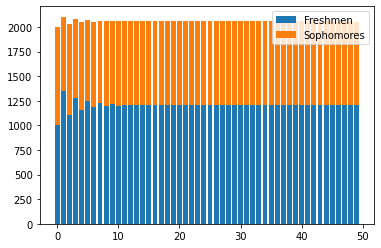

In [107]:
fig,ax = plt.subplots()

ax.bar(populations.index,populations['Freshmen'],label='Freshmen')
ax.bar(populations.index,populations['Sophomores'],bottom=populations['Freshmen'],label='Sophomores')
ax.legend()

plt.show()

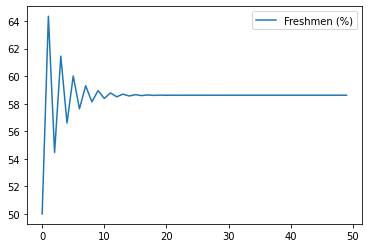

In [108]:
fig,ax = plt.subplots()
ax.plot(populations['Freshmen']/populations['Total']*100,label="Freshmen (%)")
ax.legend()
plt.show()


In [113]:
lastYear = populations.iloc[-1]
lastYear.Freshmen/lastYear.Total

0.5861901106972457